In [361]:

from api_keys import stock_key
from api_keys import sandbox_key
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime
import math 
import statistics
from scipy import stats
from pprint import pprint #formats json

In [362]:


import pyEX as p
c = p.Client(api_token=sandbox_key, version='sandbox')
#c = p.Client(api_token = stock_key, version = 'stable') when not having to use sandbox


In [363]:
#c = p.Client(api_token=stock_key, version='stable')
stock = ['XOM', 'DIS', 'DRI', 'LUV', 'HLT' ]

sym='XOM'
timeframe='2y'
XOM_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]


sym='HLT'
timeframe='2y'
HLT_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DIS'
timeframe='2y'
DIS_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DRI'
timeframe='2y'
DRI_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='LUV'
timeframe='2y'
LUV_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]


LUV_df
DIS_df
XOM_df

,close,open,high,low,symbol
date,,,,,
2021-04-23,57.32,56.01,57.1604,57.26,XOM
2021-04-22,57.74,57.19,56.4000,55.42,XOM
2021-04-21,59.00,55.60,58.0500,55.40,XOM
2021-04-20,57.21,56.74,57.1800,55.74,XOM
2021-04-19,59.12,57.95,59.5200,56.42,XOM
...,...,...,...,...,...
2019-05-01,79.42,80.72,82.0900,82.46,XOM
2019-04-30,81.40,81.89,81.7760,82.15,XOM
2019-04-29,80.76,81.01,84.2500,80.56,XOM


In [364]:
all_df = pd.concat([LUV_df, DRI_df, HLT_df, XOM_df, DIS_df], axis=0)
all_df = all_df.sort_index()
all_df

,close,open,high,low,symbol
date,,,,,
2019-04-25,141.23,138.77,145.3255,139.6200,DIS
2019-04-25,82.22,83.28,83.0500,84.7000,XOM
2019-04-25,55.64,54.21,56.7070,52.7649,LUV
2019-04-25,90.83,89.91,88.3300,90.2610,HLT
2019-04-25,122.56,120.95,123.2000,121.8000,DRI
...,...,...,...,...,...
2021-04-23,188.80,185.54,184.1190,185.1300,DIS
2021-04-23,149.03,151.75,146.1600,149.1400,DRI
2021-04-23,127.80,129.21,130.0400,127.6400,HLT


In [365]:

#pull  specific rows
XOM_days_df = XOM_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DIS_days_df = DIS_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
HLT_days_df = HLT_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
LUV_days_df = LUV_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DRI_days_df = DRI_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]

LUV_days_df



,close,open,high,low,symbol
date,,,,,
2020-01-02,56.35,54.72,56.09,55.888,LUV
2020-03-16,37.73,38.30,39.90,35.860,LUV
2021-03-16,62.05,64.56,64.70,60.890,LUV


In [366]:
three_dates_df = pd.concat([DRI_days_df, LUV_days_df, HLT_days_df, XOM_days_df, DIS_days_df], axis=0)
three_dates_df = three_dates_df.sort_index()
three_dates_df



,close,open,high,low,symbol
date,,,,,
2020-01-02,116.15,113.90,113.81,109.9400,DRI
2020-01-02,56.35,54.72,56.09,55.8880,LUV
2020-01-02,114.85,113.96,116.84,115.5200,HLT
2020-01-02,72.00,72.57,74.23,73.1818,XOM
2020-01-02,152.20,149.92,155.60,145.4000,DIS
2020-03-16,51.51,59.82,60.98,47.4300,DRI
2020-03-16,37.73,38.30,39.90,35.8600,LUV
2020-03-16,72.33,70.27,77.56,66.4700,HLT
2020-03-16,35.96,35.40,39.54,34.3400,XOM


In [367]:

Jan_2020 = three_dates_df.iloc[0:5]
March_2020 = three_dates_df.iloc[5:10]
March_2021 = three_dates_df.iloc[10:15]
March_2021



,close,open,high,low,symbol
date,,,,,
2021-03-16,147.12,150.23,150.28,142.3696,DRI
2021-03-16,62.05,64.56,64.70,60.8900,LUV
2021-03-16,127.55,131.26,129.72,128.7800,HLT
2021-03-16,59.80,60.91,62.30,60.8500,XOM
2021-03-16,199.24,198.00,204.02,198.5800,DIS


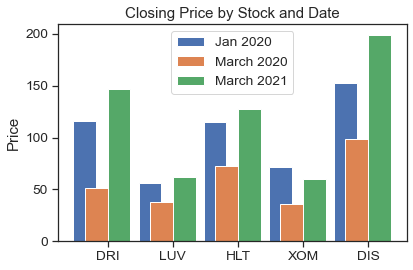

In [368]:


#PLANNING ON USING

labels = three_dates_df["symbol"].unique()

twentytwenty = Jan_2020['close']

march_twentytwenty = March_2020['close']
                
march_twentytwentyone = March_2021['close']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, twentytwenty, width, label='Jan 2020')
rects2 = ax.bar( x - width/2, march_twentytwenty, width, label='March 2020')
rects3 = ax.bar(x + width/2, march_twentytwentyone, width, label = 'March 2021')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Closing Price by Stock and Date')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

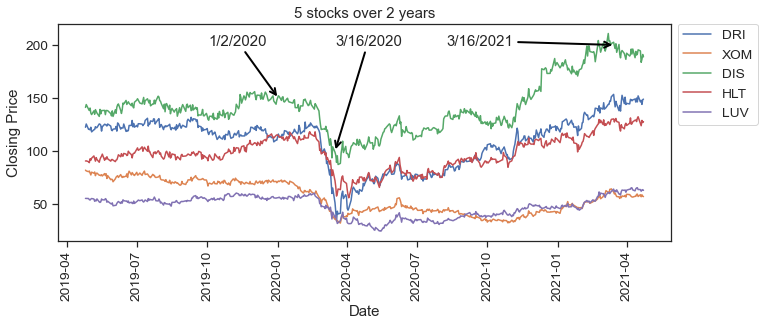

In [342]:
#PLANNING ON USING
fig_dims = (11, 4)

fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(x="date", 
                 y="close", 
                 data=all_df,
                 hue="symbol")

# Add a title "Average MPG Over Time"
g.set_title('5 stocks over 2 years')
g.set(xlabel = 'Date', ylabel = 'Closing Price')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xticks(rotation = 90)
ax.annotate("1/2/2020", xy = (pd.Timestamp('2020-01-02'), 150), xytext = (pd.Timestamp('2019-10-02'), 200), 
             arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2020", xy = (pd.Timestamp('2020-03-16'), 100), xytext = (pd.Timestamp('2020-03-16'), 200),
            arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2021", xy = (pd.Timestamp('2021-03-16'), 200), xytext = (pd.Timestamp('2020-08-09'), 200), 
            arrowprops = {'arrowstyle': '->', 'linewidth': 2, 'color': 'black'})

plt.show()

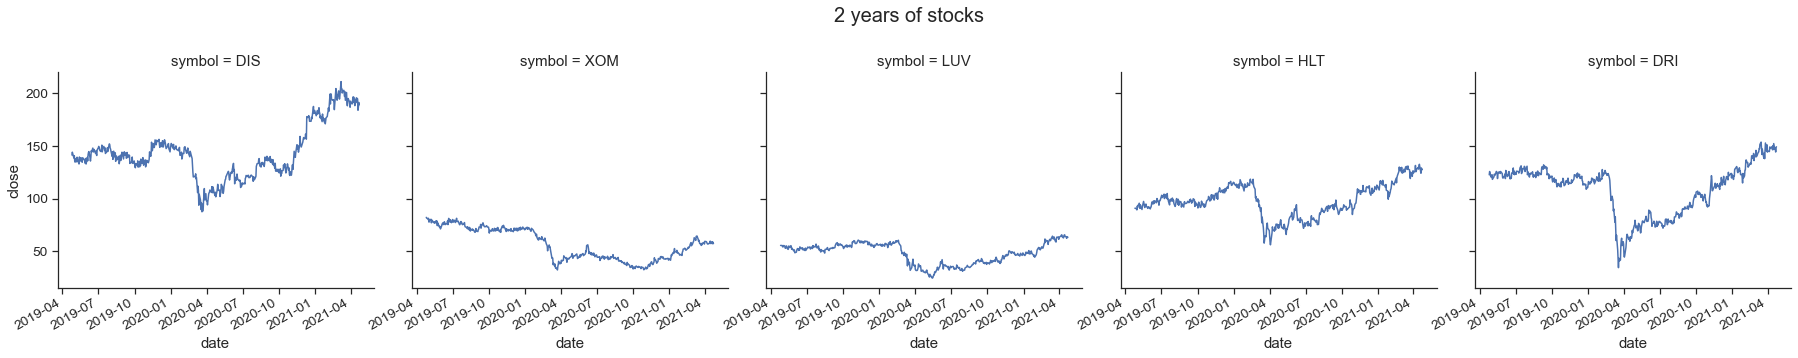

In [370]:
#PLANNING ON USING
g= sns.relplot(x = 'date', y = 'close', data = all_df, kind = "line", col = 'symbol')
g.fig.autofmt_xdate()
g.fig.suptitle('2 years of stocks', fontsize=20)
g.fig.subplots_adjust(top=.8);

In [508]:
def med (df):
    return df[['close', 'open', 'high', 'low']].median()
     



med_2yr_df = pd.DataFrame({'LUV_median': med(LUV_df), 'HLT_median': med(HLT_df), 'DIS_median': med(DIS_df), 'XOM_median': med(XOM_df), 
              'DRI_median': med(DRI_df)})

mean_2yr_df = pd.DataFrame({'LUV_median': round(mean_calc(LUV_df), 2), 'HLT_median': round(mean_calc(HLT_df),2), 
                        'DIS_median': round(mean_calc(DIS_df), 2), 
                        'XOM_median': round(mean_calc(XOM_df), 2), 
              'DRI_median': round(mean_calc(DRI_df), 2)})

display(med_2yr_df)
display(mean_2yr_df)




,LUV_median,HLT_median,DIS_median,XOM_median,DRI_median
close,50.7950,96.8300,139.0500,56.160,117.34
open,50.9800,96.5900,139.2200,55.835,117.15
high,51.6300,97.7400,140.7000,56.455,118.48
low,50.3305,95.3905,138.0025,55.350,115.52


,LUV_median,HLT_median,DIS_median,XOM_median,DRI_median
close,48.10,97.99,142.98,56.72,108.93
open,48.12,97.99,142.96,56.75,109.02
high,48.81,99.36,144.52,57.46,110.61
low,47.31,96.74,141.06,56.15,107.23


In [383]:
all_df.head()


DIS_df = DIS_df.sort_index()
DIS_2019_df = DIS_df.loc["2019-04-23":"2019-12-31"]

XOM_df = XOM_df.sort_index()
XOM_2019_df = XOM_df.loc["2019-04-23":"2019-12-31"]

DRI_df= DRI_df.sort_index()
DRI_2019_df = DRI_df.loc["2019-04-23":"2019-12-31"]

HLT_df = HLT_df.sort_index()
HLT_2019_df = HLT_df.loc["2019-04-23":"2019-12-31"]
LUV_df = LUV_df.sort_index()
LUV_2019_df = LUV_df.loc["2019-04-23":"2019-12-31"]


Xmean = round(XOM_2019_df['close'].mean(),2)
Dmean = round(DIS_2019_df['close'].mean(),2)
DRmean = round(DRI_2019_df['close'].mean(),2)
Hmean= round(HLT_2019_df['close'].mean(),2)
Lmean = round(LUV_2019_df['close'].mean(),2)

Xmedian = XOM_2019_df['close'].median()
Dmedian = DIS_2019_df['close'].median()
DRmedian = DRI_2019_df['close'].median()
Hmedian= HLT_2019_df['close'].median()
Lmedian= LUV_2019_df['close'].median()



mean_and_median_df = pd.DataFrame({'XOM mean 2019': [Xmean], 'XOM median 2019': [Xmedian], 
                        'DIS mean 2019': [Dmean], 
                        'DIS median 2019': [Dmedian]} )

mean_and_median_df



,XOM mean 2019,XOM median 2019,DIS mean 2019,DIS median 2019
0,73.76,73.075,141.83,141.015


In [502]:
lo = LUV_df.loc[('2020-03-09'),('open')]
l9=LUV_df.loc[('2020-03-09'),('close')]
l12=LUV_df.loc[('2020-03-12'),('close')]
l16 =LUV_df.loc[('2020-03-16'),('close')]



xo = XOM_df.loc[('2020-03-09'),('open')]
x9=XOM_df.loc[('2020-03-09'),('close')]
x12 = XOM_df.loc[('2020-03-12'),('close')]
x16 = XOM_df.loc[('2020-03-16'),('close')]

ho = HLT_df.loc[('2020-03-09'),('open')]
h9 = HLT_df.loc[('2020-03-09'),('close')]
h12 = HLT_df.loc[('2020-03-12'),('close')]
h16 = HLT_df.loc[('2020-03-16'),('close')]

do = DIS_df.loc[('2020-03-09'),('open')]
d9 =DIS_df.loc[('2020-03-09'),('close')]
d12 =DIS_df.loc[('2020-03-12'),('close')]
d16 =DIS_df.loc[('2020-03-16'),('close')]

dro = DRI_df.loc[('2020-03-09'),('open')]
dr9 =DRI_df.loc[('2020-03-09'),('close')]
dr12 = DRI_df.loc[('2020-03-12'),('close')]
dr16 = DRI_df.loc[('2020-03-16'),('close')]


LUV_drop_df = pd.DataFrame({'LUV 3/9/20 open': [lo], 'LUV 3/9/20': [l9], 'LUV 3/12/20': [l12], 'LUV 3/16/20': [l16]} )
XOM_drop_df = pd.DataFrame({'XOM 3/9/20 open': [xo], 'XOM 3/9/20': [x9], 'XOM 3/12/20': [x12], 'XOM 3/16/20': [x16]} )
HLT_drop_df = pd.DataFrame({'HLT 3/9/20 open': [ho], 'HLT 3/9/20': [h9], 'HLT 3/12/20': [h12], 'HLT 3/16/20': [h16]} )
DIS_drop_df = pd.DataFrame({'DIS 3/9/20 open': [do], 'DIS 3/9/20': [d9], 'DIS 3/12/20': [d12], 'DIS 3/16/20': [d16]} )
DRI_drop_df = pd.DataFrame({'DRI 3/9/20 open': [dro], 'DRI 3/9/20': [dr9], 'DRI 3/12/20': [dr12], 'DRI 3/16/20': [dr16]} )


print(LUV_drop_df.pct_change(axis = 'columns'))
print(HLT_drop_df.pct_change(axis = 'columns'))
print(DIS_drop_df.pct_change(axis = 'columns'))

print(XOM_drop_df.pct_change(axis = 'columns'))

print(DRI_drop_df.pct_change(axis = 'columns'))

LUV_pct = LUV_drop_df.pct_change(axis = 'columns')
HLT_pct = HLT_drop_df.pct_change(axis = 'columns')
DIS_pct = DIS_drop_df.pct_change(axis = 'columns')

XOM_pct = XOM_drop_df.pct_change(axis = 'columns')

DRI_pct = DRI_drop_df.pct_change(axis = 'columns')
display(XOM_pct)
display(XOM_drop_df)

   LUV 3/9/20 open  LUV 3/9/20  LUV 3/12/20  LUV 3/16/20
0              NaN    0.009905    -0.192153     0.041115
   HLT 3/9/20 open  HLT 3/9/20  HLT 3/12/20  HLT 3/16/20
0              NaN    0.020209    -0.122837    -0.061259
   DIS 3/9/20 open  DIS 3/9/20  DIS 3/12/20  DIS 3/16/20
0              NaN    -0.05265    -0.112384      0.05632
   XOM 3/9/20 open  XOM 3/9/20  XOM 3/12/20  XOM 3/16/20
0              NaN    0.013532    -0.139273    -0.038246
   DRI 3/9/20 open  DRI 3/9/20  DRI 3/12/20  DRI 3/16/20
0              NaN   -0.078229    -0.223825    -0.145346


,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,NaN,0.013532,-0.139273,-0.038246


,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,42.86,43.44,37.39,35.96


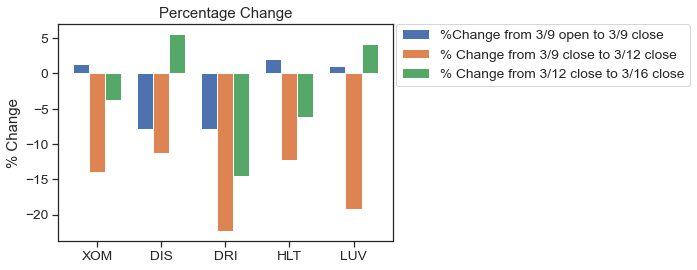

In [507]:

labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']
means = [float(XOM_pct['XOM 3/9/20']*100), float(DRI_pct['DRI 3/9/20']*100), float(DRI_pct['DRI 3/9/20']*100), float(HLT_pct['HLT 3/9/20']*100),
float(LUV_pct['LUV 3/9/20']*100)]
medians =  [float(XOM_pct['XOM 3/12/20']*100), float(DIS_pct['DIS 3/12/20']*100), float(DRI_pct['DRI 3/12/20']*100),
float(HLT_pct['HLT 3/12/20']*100), float(LUV_pct['LUV 3/12/20']*100)]
current = [float(XOM_pct['XOM 3/16/20']*100),float(DIS_pct['DIS 3/16/20']*100),float(DRI_pct['DRI 3/16/20']*100),
float(HLT_pct['HLT 3/16/20']*100),float(LUV_pct['LUV 3/16/20']*100)]


x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='%Change from 3/9 open to 3/9 close')
rects2 = ax.bar(x, medians, width, label='% Change from 3/9 close to 3/12 close')
rects3 = ax.bar(x+ .25, current, width, label="% Change from 3/12 close to 3/16 close")
ax.set_ylabel('% Change')
ax.set_title('Percentage Change')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


plt.show()

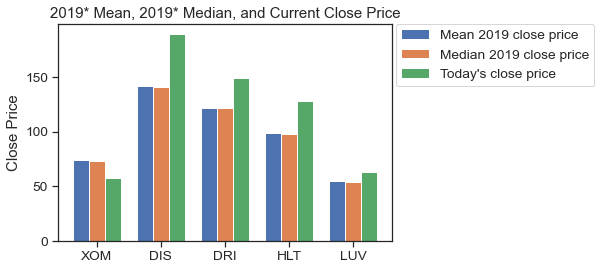

In [403]:
#bar chart 

#mean and median of 2019 vs current price





labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']
means = [Xmean, Dmean, DRmean, Hmean, Lmean]
medians = [ Xmedian, Dmedian, DRmedian, Hmedian, Lmedian]
current = [XOM_df.loc[('2021-04-23'),('close')], DIS_df.loc[('2021-04-23'),('close')],DRI_df.loc[('2021-04-23'),('close')], 
HLT_df.loc[('2021-04-23'),('close')], LUV_df.loc[('2021-04-23'),('close')]]

x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")
ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


plt.show()


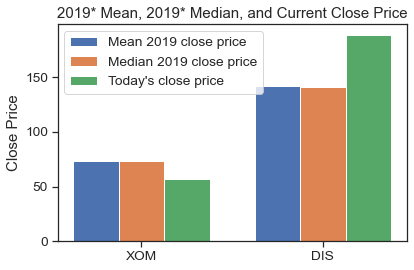

In [379]:

labels = ['XOM', 'DIS']
means = [Xmean, Dmean]
medians = [ Xmedian, Dmedian]
current = XOM_df.loc[('2021-04-23'),('close')], DIS_df.loc[('2021-04-23'),('close')]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")
#fig, ax = plt.subplots()
#rects1 = ax.bar(x-width, men_means, width, label='Mean 2019 close price')
#rects2 = ax.bar(x - width/2, women_means, width, label='Median 2019 close price')
#rects2 = ax.bar(x + width/2, third, width, label="Today's close price")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

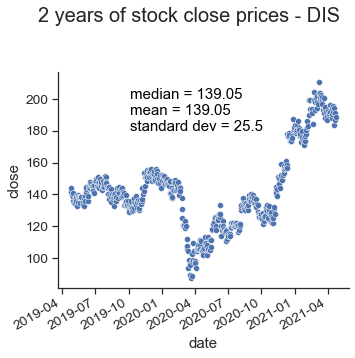

In [541]:
DIS_sd = round(statistics.stdev(DIS_df['close']),2)
DIS_df_mean = (round(DIS_df['close'].mean(),2))

DIS_df_median = DIS_df['close'].median()

g= sns.relplot(x = 'date', y = 'close', data = DIS_df, kind = "scatter")#, col = 'symbol')
g.fig.autofmt_xdate()
g.fig.suptitle('2 years of stock close prices - DIS', fontsize=20)
g.fig.subplots_adjust(top=.8)
plt.text('2019-10-04', 200, "median = "  + str(DIS_df_median),horizontalalignment='left', size='medium', color='black'), #weight='semibold')
plt.text('2019-10-04', 190, "mean = " + str(DIS_df_median) ,horizontalalignment='left', size='medium', color='black'), #weight='semibold')
plt.text('2019-10-04', 180, "standard dev = " + str(DIS_sd),horizontalalignment='left', size='medium', color='black'), #weight='semibold')


plt.show()

In [574]:
to_LUV = np.corrcoef(DIS_df['close'], LUV_df['close'])
to_XOM = np.corrcoef(DIS_df['close'], XOM_df['close'])
to_DRI =np.corrcoef(DIS_df['close'], DRI_df['close'])
to_HLT = np.corrcoef(DIS_df['close'], HLT_df['close'])
LUV_cov = round(to_LUV[0,1], 4)
XOM_cov = round(to_XOM[0,1], 4)
DRI_cov = round(to_DRI[0,1], 4)
HLT_cov = round(to_HLT[0,1], 4)

print( 'The correlation between DIS and LUV is ' + str(LUV_cov))
print( 'The correlation between DIS and XOM is ' + str(XOM_cov))
print( 'The correlation between DIS and DRI is ' + str(DRI_cov))
print( 'The correlation between DIS and HLT is ' + str(HLT_cov))



The correlation between DIS and LUV is 0.6807
The correlation between DIS and XOM is 0.2293
The correlation between DIS and DRI is 0.8332
The correlation between DIS and HLT is 0.9018
